In [1]:
### import packages

## lets basic import packages
from tkinter import *
from tkinter import messagebox

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
     
# from pandas_profiling import ProfileReport


from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier  

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

In [2]:

#importing the dataset

data= pd.read_csv('dataset.csv')
data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#remove ('_') underscore in the text

for col in data.columns:
    data[col] = data[col].str.replace('_', ' ')
    
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

#data preprocessing

# check for null values from the dataset

null_checker = data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


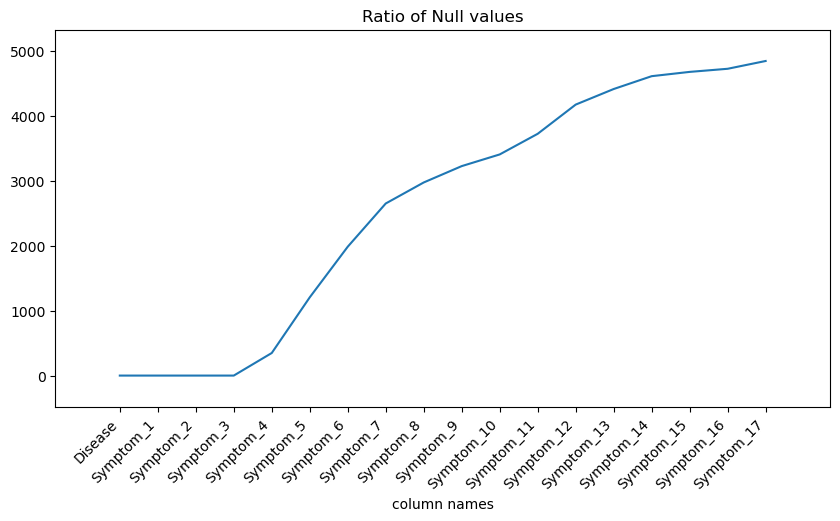

In [5]:

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()


In [6]:

#clean the null values

data=data.fillna(0)
data.isna().sum()


Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

In [7]:
cols= data.columns
data1= data[cols].values.flatten()

reshaped = pd.Series(data1)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(data.shape)

data = pd.DataFrame(reshaped, columns = data.columns)
data.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,muscle pain,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [9]:
## lets explore symptom severity

Symptom_severity = pd.read_csv('Symptom-severity.csv')
Symptom_severity

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3


In [10]:
Symptom_severity['Symptom'] =Symptom_severity['Symptom'].str.replace('_',' ')
Symptom_severity.head(15)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [11]:
# lets encode sysptoms in the data

vals = data.values
symptoms =Symptom_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = Symptom_severity[Symptom_severity['Symptom'] == symptoms[i]]['weight'].values[0]


In [12]:
data_processed = pd.DataFrame(vals, columns=cols)
data_processed=data_processed.fillna(0)
data_processed.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
## assign symptoms with no rank to zero

data_processed = data_processed.replace('dischromic  patches', 0)
data_processed = data_processed.replace('spotting  urination', 0)
data_processed = data_processed.replace('foul smell of urine', 0)
data_processed.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:

# charactieristics of data

data_processed.describe()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,3.410976,4.147561,4.043902,3.828049,3.114634,2.654878,2.059756,1.712195,1.554878,1.304878,0.979268,0.702439,0.492683,0.323171,0.282927,0.136585,0.029268
std,1.316310,1.232387,1.390184,1.921436,2.169638,2.384472,2.340259,2.244483,2.250034,2.061402,1.880334,1.799707,1.529126,1.305543,1.298518,0.719747,0.240191
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,5.000000,2.000000


In [15]:
#extracting features and target variables

x= data_processed.iloc[:,1:]
y=data[['Disease']]
np.ravel(y)



array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [16]:
# split train and test data

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)


In [17]:
#performance testing

def performance (model, xtest, ytest):
    precision = precision_score(ytest,predict,average='micro')*100
    
    accuracy = accuracy_score(ytest,predict)*100
    
    f1 = f1_score(ytest,predict, average='macro')*100
    
    recall = recall_score(ytest,predict, average='macro')*100
    
    print('precision----->', precision) 
    print('\n************************')
    print('Accuracy----->', accuracy)
    print('\n************************')
    print('F1 Score----->', f1)
    print('\n************************')
    print('Recall----->', recall)
    print('\n************************')
    return accuracy, precision, f1, recall

In [18]:
# Machine Learning Algorithms

# 1) Naive_bayes

model=GaussianNB()
model.fit(xtrain,ytrain.values.ravel())
predict=model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 87.09349593495935

************************
Accuracy-----> 87.09349593495935

************************
F1 Score-----> 85.96222074879608

************************
Recall-----> 86.62397443084015

************************


(87.09349593495935, 87.09349593495935, 85.96222074879608, 86.62397443084015)

In [19]:

# 2) SVR

model=SVC(kernel='linear')
model.fit(xtrain,ytrain.values.ravel())
predict=model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 97.86585365853658

************************
Accuracy-----> 97.86585365853658

************************
F1 Score-----> 98.14413271002607

************************
Recall-----> 98.10877867008556

************************


(97.86585365853658, 97.86585365853658, 98.14413271002607, 98.10877867008556)

In [21]:
# 3) GradientBoostingClassifier

model=GradientBoostingClassifier(learning_rate=0.2)
model.fit(xtrain,ytrain.values.ravel())
predict=model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 99.59349593495935

************************
Accuracy-----> 99.59349593495935

************************
F1 Score-----> 99.61438693019439

************************
Recall-----> 99.6103896103896

************************


(99.59349593495935, 99.59349593495935, 99.61438693019439, 99.6103896103896)

In [22]:
# 4) RandomForest


model= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model.fit(xtrain, ytrain.values.ravel()) 
predict=model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)
performance (model, xtest, ytest)

precision-----> 99.59349593495935

************************
Accuracy-----> 99.59349593495935

************************
F1 Score-----> 99.61438693019439

************************
Recall-----> 99.6103896103896

************************


(99.59349593495935, 99.59349593495935, 99.61438693019439, 99.6103896103896)

In [23]:
newresult=model.predict([[3,4,2,1,2,5,4,0,0,0,0,0,0,0,0,0,0]])
print(newresult)

['Psoriasis']


In [24]:


print(classification_report(ytest,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        21
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        22
                    Alcoholic hepatitis       1.00      1.00      1.00        18
                                Allergy       0.96      1.00      0.98        25
                              Arthritis       1.00      1.00      1.00        21
                       Bronchial Asthma       1.00      1.00      1.00        19
                   Cervical spondylosis       0.92      1.00      0.96        24
                            Chicken pox       1.00      1.00      1.00        26
                    Chronic cholestasis       1.00      1.00      1.00        23
                            Common Cold       1.00      1.00      1.00        25
                           

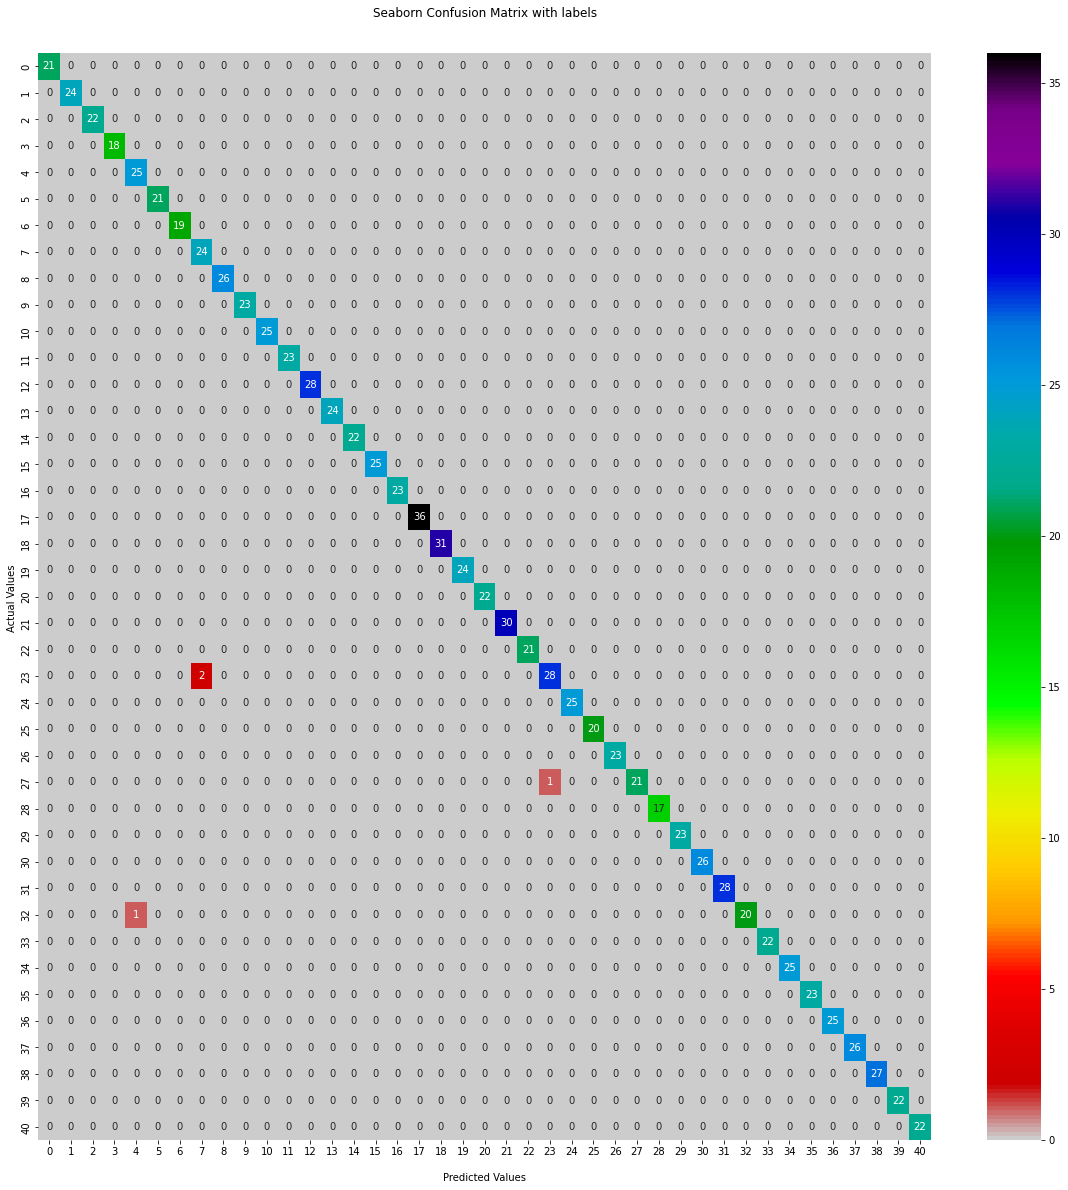

In [25]:
## Display the visualization of the Confusion Matrix.

cf_matrix=confusion_matrix(ytest,predict)
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(cf_matrix, annot=True, cmap='nipy_spectral_r')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()


In [26]:
# GUI interface

disease=data_processed['Disease']

def message():
    if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
        messagebox.showinfo("OPPS!!", "ENTER  SYMPTOMS PLEASE")
    else :
        RandomForest()


        

In [27]:
#RandomForest

def RandomForest():
    model= RandomForestClassifier(n_estimators= 10, criterion="entropy")
    model.fit(xtrain,ytrain.values.ravel())
    predict=model.predict(xtest)
    psymptoms = (Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),Symptom6.get(),Symptom7.get(),Symptom8.get(),Symptom9.get(),Symptom10.get())

    lis=pd.DataFrame(psymptoms)

    lis=lis.replace('itching',1)
    lis=lis.replace('skin rash',3)
    lis=lis.replace('nodal skin eruptions',4)
    lis=lis.replace('continuous sneezing',4)
    lis=lis.replace('shivering',5)
    lis=lis.replace('chills',3)
    lis=lis.replace('joint pain',3)
    lis=lis.replace('stomach pain',5)
    lis=lis.replace('acidity',3)
    lis=lis.replace('ulcers on tongue',4)
    lis=lis.replace('muscle wasting',3)
    lis=lis.replace('vomiting',5)
    lis=lis.replace('burning micturition',6)
    lis=lis.replace('spotting urination',6)
    lis=lis.replace('fatigue',4)
    lis=lis.replace('weight gain',3)
    lis=lis.replace('anxiety',4)
    lis=lis.replace('cold hands and feets',5)
    lis=lis.replace('mood swings',3)
    lis=lis.replace('weight loss',3)
    lis=lis.replace('restlessness',5)
    lis=lis.replace('lethargy',2)
    lis=lis.replace('patches in throat',6)
    lis=lis.replace('irregular sugar level',5)
    lis=lis.replace('cough',4)
    lis=lis.replace('high fever',7)
    lis=lis.replace('sunken eyes',3)
    lis=lis.replace('breathlessness',4)
    lis=lis.replace('sweating',3)
    lis=lis.replace('dehydration',4)
    lis=lis.replace('indigestion',5)
    lis=lis.replace('headache',3)
    lis=lis.replace('yellowish skin',3)
    lis=lis.replace('dark urine',4)
    lis=lis.replace('nausea',5)
    lis=lis.replace('loss of appetite',4)
    lis=lis.replace('pain behind the eyes',4)
    lis=lis.replace('back pain',3)
    lis=lis.replace('constipation',4)
    lis=lis.replace('abdominal pain',4)
    lis=lis.replace('diarrhoea',6)
    lis=lis.replace('mild fever',5)
    lis=lis.replace('yellow urine',4)
    lis=lis.replace('yellowing of eyes',4)
    lis=lis.replace('acute liver failure',6)
    lis=lis.replace('fluid overload',6)
    lis=lis.replace('swelling of stomach',7)
    lis=lis.replace('swelled lymph nodes',6)
    lis=lis.replace('malaise',6)
    lis=lis.replace('blurred and distorted vision',5)
    lis=lis.replace('phlegm',5)
    lis=lis.replace('throat irritation',4)
    lis=lis.replace('redness of eyes',5)
    lis=lis.replace('sinus pressure',4)
    lis=lis.replace('runny nose',5)
    lis=lis.replace( 'congestion',5)
    lis=lis.replace('chest pain',7)
    lis=lis.replace('weakness in limbs',7)
    lis=lis.replace('fast heart rate',5)
    lis=lis.replace('pain during bowel movements',5)
    lis=lis.replace('pain in anal region',6)
    lis=lis.replace('bloody stool',5)
    lis=lis.replace('irritation in anus',6)
    lis=lis.replace('neck pain',5)
    lis=lis.replace('dizziness',4)
    lis=lis.replace('cramps',4)
    lis=lis.replace('bruising',4)
    lis=lis.replace('obesity',4)
    lis=lis.replace('swollen legs',5)
    lis=lis.replace('swollen blood vessels',5)
    lis=lis.replace('puffy face and eyes',5)
    lis=lis.replace('enlarged thyroid',6)
    lis=lis.replace('brittle nails',5)
    lis=lis.replace('swollen extremeties',5)
    lis=lis.replace('excessive hunger',4)
    lis=lis.replace('extra marital contacts',5)
    lis=lis.replace('drying and tingling lips',4)
    lis=lis.replace('slurred speech',4)
    lis=lis.replace('knee pain',3)
    lis=lis.replace('hip joint pain',2)
    lis=lis.replace('muscle weakness',2)
    lis=lis.replace('stiff neck',4)
    lis=lis.replace('swelling joints',5)
    lis=lis.replace('movement stiffness',5)
    lis=lis.replace('spinning movements',6)
    lis=lis.replace('loss of balance',4)
    lis=lis.replace('unsteadiness',4)
    lis=lis.replace('weakness of one body side',4)
    lis=lis.replace('loss of smell',3)
    lis=lis.replace('bladder discomfort',4)
    lis=lis.replace('foul smell ofurine',5)
    lis=lis.replace('continuous feel of urine',6)
    lis=lis.replace('passage of gases',5)
    lis=lis.replace('internal itching',4)
    lis=lis.replace('toxic look (typhos)',5)
    lis=lis.replace('depression',3)
    lis=lis.replace('irritability',2)
    lis=lis.replace('muscle pain',2)
    lis=lis.replace('altered sensorium',2)
    lis=lis.replace('red spots over body',3)
    lis=lis.replace('belly pain',4)
    lis=lis.replace('abnormal menstruation',6)
    lis=lis.replace('dischromic patches',6)
    lis=lis.replace('watering from eyes',4)
    lis=lis.replace('increased appetite',5)
    lis=lis.replace('polyuria',4)
    lis=lis.replace('family history',5)
    lis=lis.replace('mucoid sputum',4)
    lis=lis.replace('rusty sputum',4)
    lis=lis.replace('lack of concentration',3)
    lis=lis.replace('visual disturbances',3)
    lis=lis.replace('receiving blood transfusion',5)
    lis=lis.replace('receiving unsterile injections',2)
    lis=lis.replace('coma',7)
    lis=lis.replace('stomach bleeding',6)
    lis=lis.replace('distention of abdomen',4)
    lis=lis.replace('history of alcohol consumption',5)
    lis=lis.replace('fluid overload',4)
    lis=lis.replace('blood in sputum',5)
    lis=lis.replace('prominent veins on calf',6)
    lis=lis.replace('palpitations',4)
    lis=lis.replace('painful walking',2)
    lis=lis.replace('pus filled pimples',2)
    lis=lis.replace('blackheads',2)
    lis=lis.replace('scurring',2)
    lis=lis.replace('skin peeling',3)
    lis=lis.replace('silver like dusting',2)
    lis=lis.replace('small dents in nails',2)
    lis=lis.replace('inflammatory nails',2)
    lis=lis.replace('blister',4)
    lis=lis.replace('red sore around nose',2)
    lis=lis.replace('yellow crust ooze',3)
    lis=lis.replace('prognosis',5)
    lis=lis.replace('dischromic  patches', 0)
    lis=lis.replace('spotting  urination', 0)
    lis=lis.replace('foul smell of urine', 0)
    lis=lis.replace('None',0)
    
    li1=lis[0][0]
    li2=lis[0][1]
    li3=lis[0][2]
    li4=lis[0][3]
    li5=lis[0][4]
    li6=lis[0][5]
    li7=lis[0][6]
    li8=lis[0][7]
    li9=lis[0][8]
    li10=lis[0][9]
    li11=0
    
    result=model.predict([[li1,li2,li3,li4,li5,li6,li7,li8,li9,li10,li11,li11,li11,li11,li11,li11,li11]])
    t3.insert(END,result[0])
   
   

In [ ]:

root = Tk()
root.title(" Disease Prediction From Symptoms")
img = PhotoImage(file="medical.png")
label = Label(root,image=img)
label.place(x=0, y=0)

root.configure()

Symptom1 = StringVar()
Symptom1.set(None)
Symptom2 = StringVar()
Symptom2.set(None)
Symptom3 = StringVar()
Symptom3.set(None)
Symptom4 = StringVar()
Symptom4.set(None)
Symptom5 = StringVar()
Symptom5.set(None)
Symptom6 = StringVar()
Symptom6.set(None)
Symptom7 = StringVar()
Symptom7.set(None)
Symptom8 = StringVar()
Symptom8.set(None)
Symptom9 = StringVar()
Symptom9.set(None)
Symptom10 = StringVar()
Symptom10.set(None)

w2 = Label(root, justify=LEFT, text=" Disease Prediction From Symptoms ",bg = "#88cffa")
w2.config(font=("Elephant", 30))
w2.grid(row=1, column=0, columnspan=2, padx=100)

NameLb1 = Label(root, text="")
NameLb1.config(font=("Elephant", 15))
NameLb1.grid(row=5, column=0, pady=10,  sticky=W)

S1Lb = Label(root,  text="Symptom 1",bg = "#e3e9f7")
S1Lb.config(font=("Elephant", 15))
S1Lb.grid(row=7, column=0, pady=10 , sticky=W)

S2Lb = Label(root,  text="Symptom 2",bg = "#e3e9f7")
S2Lb.config(font=("Elephant", 15))
S2Lb.grid(row=8, column=0, pady=10, sticky=W)

S3Lb = Label(root,  text="Symptom 3",bg = "#e3e9f7")
S3Lb.config(font=("Elephant", 15))
S3Lb.grid(row=9, column=0, pady=10, sticky=W)

S4Lb = Label(root,  text="Symptom 4",bg = "#e3e9f7")
S4Lb.config(font=("Elephant", 15))
S4Lb.grid(row=10, column=0, pady=10, sticky=W)

S5Lb = Label(root,  text="Symptom 5",bg = "#e3e9f7")
S5Lb.config(font=("Elephant", 15))
S5Lb.grid(row=11, column=0, pady=10, sticky=W)

S6Lb = Label(root,  text="Symptom 6",bg = "#e3e9f7")
S6Lb.config(font=("Elephant", 15))
S6Lb.grid(row=7, column=1, pady=10, sticky=W)

S7Lb = Label(root,  text="Symptom 7",bg = "#e3e9f7")
S7Lb.config(font=("Elephant", 15))
S7Lb.grid(row=8, column=1, pady=10, sticky=W)

S8Lb = Label(root,  text="Symptom 8",bg = "#e3e9f7")
S8Lb.config(font=("Elephant", 15))
S8Lb.grid(row=9, column=1, pady=10, sticky=W)

S9Lb = Label(root,  text="Symptom 9",bg = "#e3e9f7")
S9Lb.config(font=("Elephant", 15))
S9Lb.grid(row=10, column=1, pady=10, sticky=W)

S10Lb = Label(root,  text="Symptom 10",bg = "#e3e9f7")
S10Lb.config(font=("Elephant", 15))
S10Lb.grid(row=11, column=1, pady=10, sticky=W)


lr = Button(root, text="Predict",height=2, width=20, command=message)
lr.config(font=("Elephant", 15))
lr.grid(row=16, column=0,pady=20)

OPTIONS = sorted(Symptom_severity['Symptom'].unique())

S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=0)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=0)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=0)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=0)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=0)

S6En = OptionMenu(root, Symptom6,*OPTIONS)
S6En.grid(row=7, column=1)

S7En = OptionMenu(root, Symptom7,*OPTIONS)
S7En.grid(row=8, column=1)

S8En = OptionMenu(root, Symptom8,*OPTIONS)
S8En.grid(row=9, column=1)

S9En = OptionMenu(root, Symptom9,*OPTIONS)
S9En.grid(row=10, column=1)

S10En = OptionMenu(root, Symptom10,*OPTIONS)
S10En.grid(row=11, column=1)



NameLb = Label(root, text="")
NameLb.config(font=("Elephant", 20))
NameLb.grid(row=18, column=0, pady=10,  sticky=W)

NameLb = Label(root, text="")
NameLb.config(font=("Elephant", 15))
NameLb.grid(row=18, column=0, pady=10,  sticky=W)

t3 = Text(root, height=1.6, width=12)
t3.config(font=("Arial", 25))
t3.grid(row=16, column=1 , padx=10)

root.mainloop()
